Kevin Armbruster - 930519-T711
xxx

In [1]:
% load_ext autoreload
% autoreload 2

In [31]:
import numpy as np
import maze as mz
import matplotlib.pyplot as plt

In [3]:
# Description of the maze as a numpy array
maze = np.array([
    [0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 1, 1],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 2, 0, 0]
])
# with the convention 
# 0 = empty cell
# 1 = obstacle
# 2 = exit of the Maze

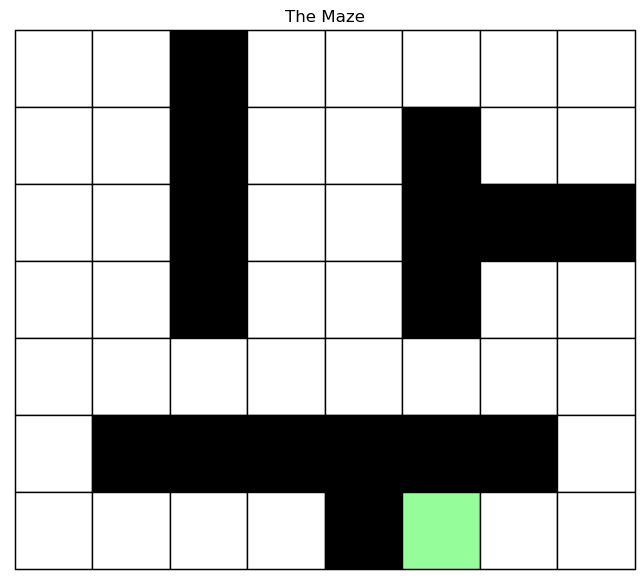

In [4]:
mz.draw_maze(maze)

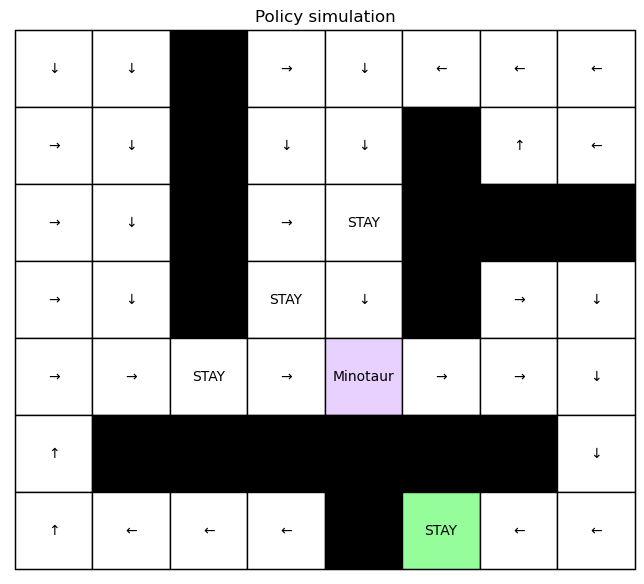

In [24]:
env = mz.Maze(maze, minotaur_can_stay=False)
#env.show()
horizon = 20
V, policy_DP_nostay = mz.dynamic_programming(env, horizon)
mz.visualize_policy(env, policy_DP_nostay, (4, 4))

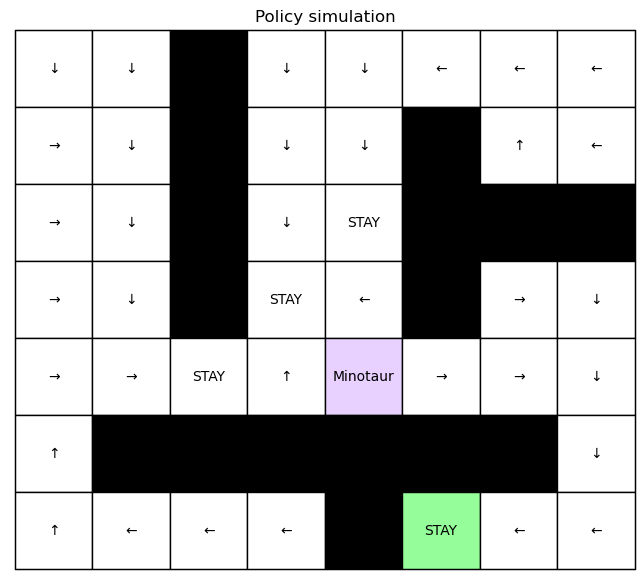

In [25]:
env = mz.Maze(maze, minotaur_can_stay=True)
#env.show()
horizon = 20
V, policy_DP_stay = mz.dynamic_programming(env, horizon)
mz.visualize_policy(env, policy_DP_stay, (4, 4))

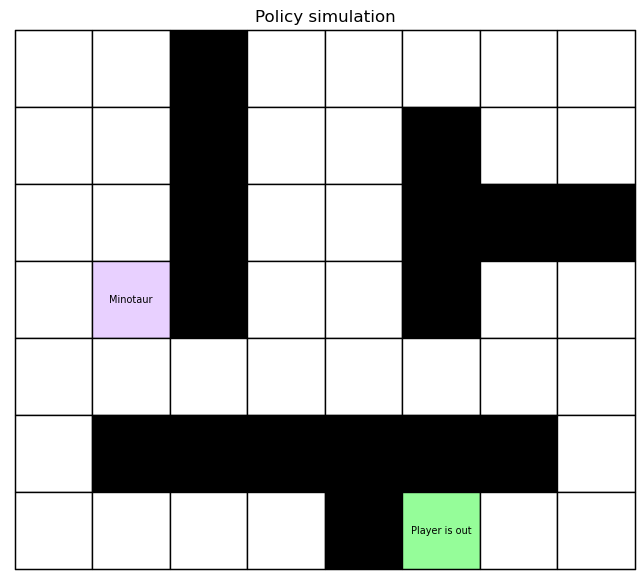

In [26]:
start = (0, 0, 6, 5)
path = env.simulate_DP(start, policy_DP_stay)
mz.animate_solution(maze, path)

In [ ]:
mz.visualize_probability_over_time_horizons(maze)

In [27]:
env = mz.Maze(maze, minotaur_can_stay=False)
# Discount Factor
gamma = 29 / 30
# Accuracy treshold
epsilon = 0.0001
V, policy_VI_nostay = mz.value_iteration(env, gamma, epsilon)

Needed iterations:  200 , Final error:  1135.922327004373


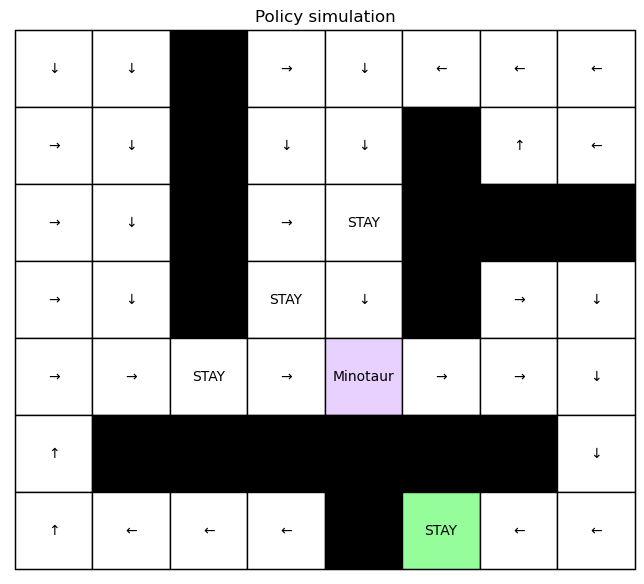

In [28]:
mz.visualize_policy(env, policy_VI_nostay, (4, 4))

In [29]:
env = mz.Maze(maze, minotaur_can_stay=True)
# Discount Factor
gamma = 29 / 30
# Accuracy treshold
epsilon = 0.0001
V, policy_VI_stay = mz.value_iteration(env, gamma, epsilon)

Needed iterations:  200 , Final error:  1135.922327004373


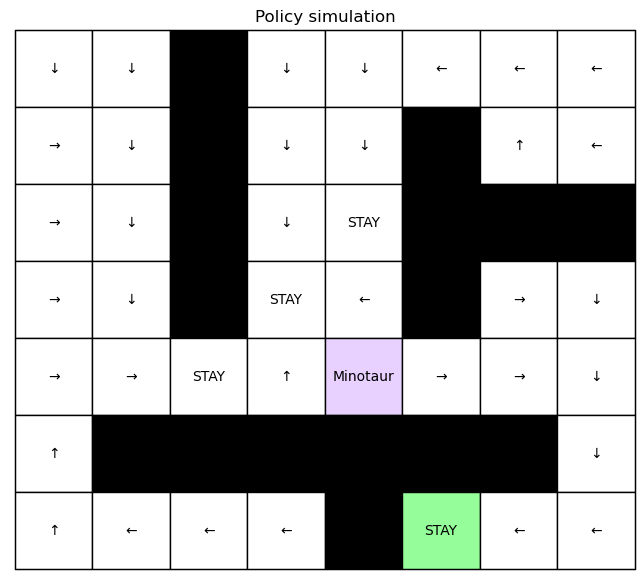

In [30]:
mz.visualize_policy(env, policy_VI_stay, (4, 4))

In [ ]:
start = (0, 0, 6, 5)
prob = 0
runs = 10000
for i in range(runs):
    path = env.simulate_VI(start, policy_VI_stay)
    prob += env.maze[path[-1][0:2]] == 2
prob = prob / runs
print("Probability to survive: ", prob)

In [ ]:
start = (0, 0, 6, 5)
path = env.simulate_VI(start, policy_VI_stay)
mz.animate_solution(maze, path)